In [1]:
from __future__ import print_function, division
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import cartopy.crs as crs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.cm as cm

In [2]:
plt.rcParams["figure.figsize"] = [8,8]
np.set_printoptions(suppress=True)

def read_SSMIS_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    TB1 = nc_fid.variables["fcdr_tb91h_asc"][:]  # shape lat, lon as shown above
    TB2 = nc_fid.variables["fcdr_tb91v_asc"][:]  # shape lat, lon as shown above
    TB3 = nc_fid.variables["fcdr_tb22v_asc"][:]  # shape lat, lon as shown above
    lat = nc_fid.variables['lat'][:]  # extract/copy the data
    lon = nc_fid.variables['lon'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return TB1, TB2, TB3, lat, lon, names

SSMIS_file = 'CSU_SSMIS_ICDR-GRID_V02R00_F18_D20230426.nc'
TB1, TB2, TB3, lat, lon, names = read_SSMIS_plot(SSMIS_file)

TB1 = TB1[450:500,1075:1125]
TB1_max = np.amax(TB1) 
TB1_min = np.amin(TB1)
print("TB1 max =", TB1_max)
print("TB1 min =", TB1_min)
print("TB1 = ", TB1, TB1.shape)
TB2 = TB2[450:500,1075:1125]
TB2_max = np.amax(TB2)
TB2_min = np.amin(TB2)
print("TB2 max =", TB2_max)
print("TB2 min =", TB2_min)
print("TB2 = ", TB2, TB2.shape)

TB3 = TB3[450:500,1075:1125]
TB3_max = np.amax(TB3)
TB3_min = np.amin(TB3)
print("TB3 max =", TB3_max)
print("TB3 min =", TB3_min)
print("TB3 = ", TB3, TB3.shape)

lons,lats = np.meshgrid(lon,lat)
print('lats shape, lons shape', lats.shape, lons.shape, lats,lons)
lat = lats[450:500,1075:1125]
lon = lons[450:500,1075:1125]
print("Lat = ", lat, lat.shape)
print("Lon = ", lon, lon.shape)   

TB1 max = 290.58
TB1 min = 132.75
TB1 =  [[254.47000122070312 252.6999969482422 245.50999450683594 ...
  264.7200012207031 255.3699951171875 252.92999267578125]
 [254.39999389648438 252.3699951171875 252.3699951171875 ...
  239.94000244140625 240.22000122070312 240.52999877929688]
 [257.9800109863281 255.1999969482422 253.27000427246094 ...
  234.9600067138672 234.9600067138672 235.6699981689453]
 ...
 [265.7099914550781 265.7099914550781 267.7200012207031 ... -- -- --]
 [268.6499938964844 268.6499938964844 269.5799865722656 ... -- -- --]
 [269.4700012207031 269.4700012207031 269.55999755859375 ... -- -- --]] (50, 50)
TB2 max = 291.96
TB2 min = 141.25
TB2 =  [[274.8399963378906 273.8599853515625 270.32000732421875 ...
  280.3299865722656 276.8500061035156 275.6700134277344]
 [274.6300048828125 272.95001220703125 272.95001220703125 ...
  269.510009765625 269.8699951171875 269.7699890136719]
 [276.1199951171875 275.1300048828125 273.55999755859375 ...
  268.2099914550781 268.209991455078

SI89 max = 102.479996
SI89 min = -37.389984
SI89 =  [[-31.629989624023438 -31.579986572265625 -30.760009765625 ...
  -21.22998046875 -22.100006103515625 -24.52001953125]
 [-31.410003662109375 -30.620010375976562 -30.620010375976562 ...
  -27.1400146484375 -30.029998779296875 -29.529983520507812]
 [-32.31999206542969 -31.3800048828125 -31.069992065429688 ...
  -32.16999816894531 -32.16999816894531 -32.019989013671875]
 ...
 [-2.040008544921875 -2.040008544921875 -2.02001953125 ... -- -- --]
 [-3.040008544921875 -3.040008544921875 -2.5 ... -- -- --]
 [-2.20001220703125 -2.20001220703125 -0.160003662109375 ... -- -- --]] (50, 50)
PCT mean =  285.69161286963765
PCT max = 297.83682
PCT min = 148.20297
PCT =  [[291.50262451171875 291.1688232421875 290.6145935058594 ...
  293.09893798828125 294.420654296875 294.27130126953125]
 [291.17816162109375 289.7844543457031 289.7844543457031 ...
  293.6982421875 294.1236572265625 293.68829345703125]
 [290.95849609375 291.4327392578125 290.157196044921

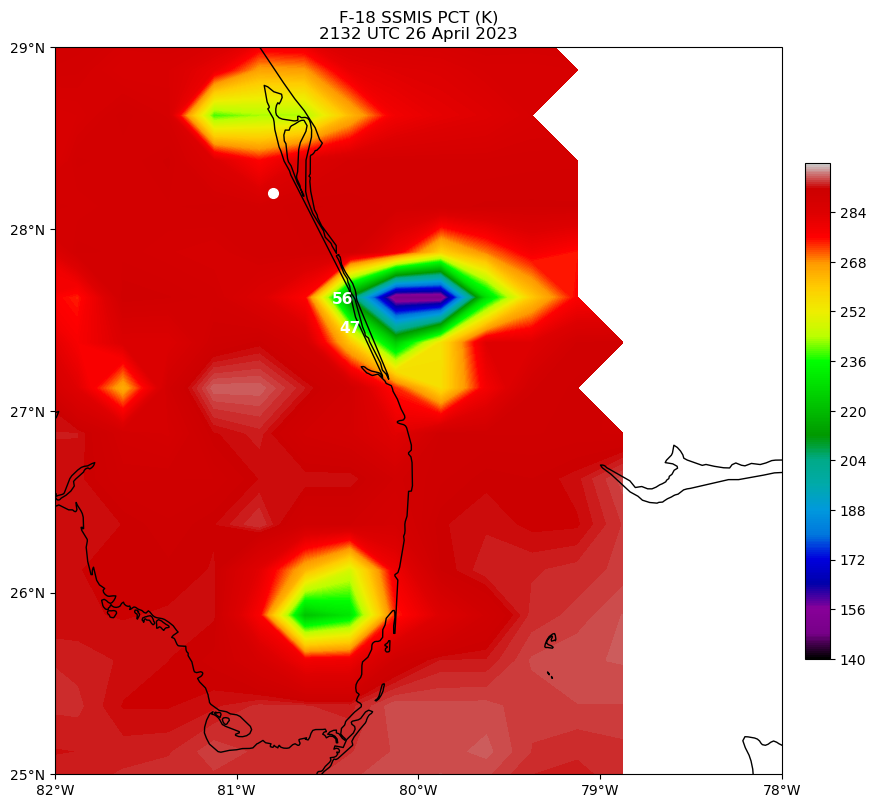

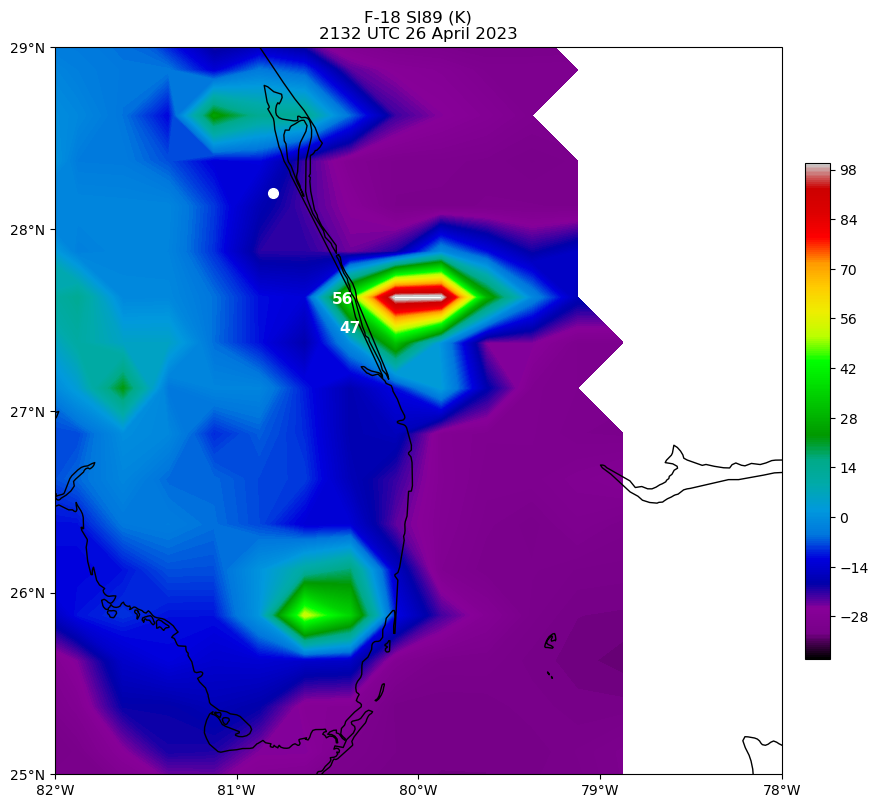

In [3]:
SI89 = TB3 - TB2
SI89_max = np.amax(SI89)
SI89_min = np.amin(SI89)
print("SI89 max =", SI89_max)
print("SI89 min =", SI89_min)
print("SI89 = ", SI89, SI89.shape)

PCT = (1.818*TB2)-(0.818*TB1)
PCTmn = np.mean(PCT)
print("PCT mean = ", PCTmn)
PCT_max = np.amax(PCT)
PCT_min = np.amin(PCT)
print("PCT max =", PCT_max)
print("PCT min =", PCT_min)
print("PCT = ", PCT, PCT.shape)

fig = plt.figure(figsize=(10, 12))
img_extent = (-82, -78, 25, 29)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-82, -78, 25, 29], crs.PlateCarree(globe=None))

plt.title('F-18 SSMIS PCT (K)\n'
          '2132 UTC 26 April 2023')

Tlevels = np.arange(140,300,0.1)
cbtd = ax.contourf(lon,lat,PCT,Tlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='nipy_spectral')

ax.set_xticks([-82,-81,-80,-79,-78])
ax.set_yticks([25,26,27,28,29])   

ax.plot(-80.8, 28.2, 'ow', markersize=7, transform=crs.Geodetic())
ax.text(-80.41806, 27.65556, '56', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-80.37667, 27.49806, '47', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("ssmis_pct_2132.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-82, -78, 25, 29)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-82, -78, 25, 29], crs.PlateCarree(globe=None))

plt.title('F-18 SI89 (K)\n'
          '2132 UTC 26 April 2023')

Tlevels = np.arange(-40,100,0.1)
cbtd = ax.contourf(lon,lat,SI89,Tlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='nipy_spectral')

ax.set_xticks([-82,-81,-80,-79,-78])
ax.set_yticks([25,26,27,28,29])   

ax.plot(-80.8, 28.2, 'ow', markersize=7, transform=crs.Geodetic())
ax.text(-80.41806, 27.65556, '56', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-80.37667, 27.49806, '47', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("ssmis_si89_2132.png",dpi=250,bbox_inches='tight')
plt.show()

In [9]:
plt.rcParams["figure.figsize"] = [8,8]
np.set_printoptions(suppress=True)

def read_SSMIS_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    TB1 = nc_fid.variables["fcdr_tb91h_img2"][:]  # shape lat, lon as shown above
    TB2 = nc_fid.variables["fcdr_tb91v_img2"][:]  # shape lat, lon as shown above
    TB3 = nc_fid.variables["fcdr_tb183_7h_img1"][:]  # shape lat, lon as shown above
    lat1 = nc_fid.variables['lat_img1'][:]  # extract/copy the data
    lon1 = nc_fid.variables['lon_img1'][:]
    lat2 = nc_fid.variables['lat_img2'][:]  # extract/copy the data
    lon2 = nc_fid.variables['lon_img2'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return TB1, TB2, TB3, lat1, lon1, lat2, lon2, names

SSMIS_file = 'CSU_SSMIS_FCDR_V02R00_F18_D20230426_S2125_E2307_R069731.nc'
TB1, TB2, TB3, lat1, lon1, lat2, lon2, names = read_SSMIS_plot(SSMIS_file)

lat_1 = lat1[100:300,:]
lon_1 = lon1[100:300,:]
lat_2 = lat2[100:300,:]
lon_2 = lon2[100:300,:]
print('lat1 shape, lon1 shape', lat_1.shape, lon_1.shape, lat_1,lon_1)
print('lat2 shape, lon2 shape', lat_2.shape, lon_2.shape, lat_2,lon_2)

TB1 = TB1[100:300,:]
TB1_max = np.amax(TB1) 
TB1_min = np.amin(TB1)
print("TB1 max =", TB1_max)
print("TB1 min =", TB1_min)
print("TB1 = ", TB1, TB1.shape)
TB2 = TB2[100:300,:]
TB2_max = np.amax(TB2)
TB2_min = np.amin(TB2)
print("TB2 max =", TB2_max)
print("TB2 min =", TB2_min)
print("TB2 = ", TB2, TB2.shape)

TB3 = TB3[100:300,:]
TB3_max = np.amax(TB3)
TB3_min = np.amin(TB3)
print("TB3 max =", TB3_max)
print("TB3 min =", TB3_min)
print("TB3 = ", TB3, TB3.shape)

lat1 shape, lon1 shape (200, 180) (200, 180) [[14.666 14.771 14.875 ... 12.967 12.854 12.741]
 [14.776 14.881 14.986 ... 13.077 12.964 12.851]
 [14.887 14.992 15.096 ... 13.186 13.073 12.96 ]
 ...
 [36.463 36.57  36.676 ... 34.304 34.189 34.075]
 [36.574 36.681 36.787 ... 34.411 34.296 34.181]
 [36.684 36.791 36.898 ... 34.517 34.403 34.288]] [[-76.74  -76.789 -76.839 ... -92.632 -92.654 -92.674]
 [-76.762 -76.811 -76.861 ... -92.661 -92.683 -92.703]
 [-76.784 -76.833 -76.883 ... -92.691 -92.713 -92.733]
 ...
 [-80.787 -80.841 -80.897 ... -99.768 -99.782 -99.793]
 [-80.807 -80.861 -80.917 ... -99.814 -99.827 -99.838]
 [-80.826 -80.881 -80.937 ... -99.86  -99.873 -99.884]]
lat2 shape, lon2 shape (200, 180) (200, 180) [[14.713 14.819 14.924 ... 12.909 12.796 12.682]
 [14.823 14.93  15.035 ... 13.019 12.905 12.791]
 [14.934 15.04  15.146 ... 13.128 13.014 12.901]
 ...
 [36.506 36.614 36.722 ... 34.243 34.128 34.012]
 [36.617 36.725 36.832 ... 34.35  34.234 34.119]
 [36.728 36.836 36.943 .

PCT mean =  285.88077
PCT max = 303.64532
PCT min = 110.22851
PCT =  [[293.8637  293.94064 295.92288 ... 292.93176 295.68344 293.05566]
 [293.827   296.59552 295.19263 ... 294.34808 294.97253 294.44366]
 [296.01184 294.59656 295.52307 ... 293.72446 293.03735 294.0437 ]
 ...
 [270.07312 269.51947 271.94394 ... 280.1798  283.21387 284.52466]
 [269.0849  272.68555 270.40887 ... 281.8932  282.07224 281.07227]
 [271.40836 272.6842  270.91238 ... 280.8742  282.44763 280.9287 ]] (200, 180)


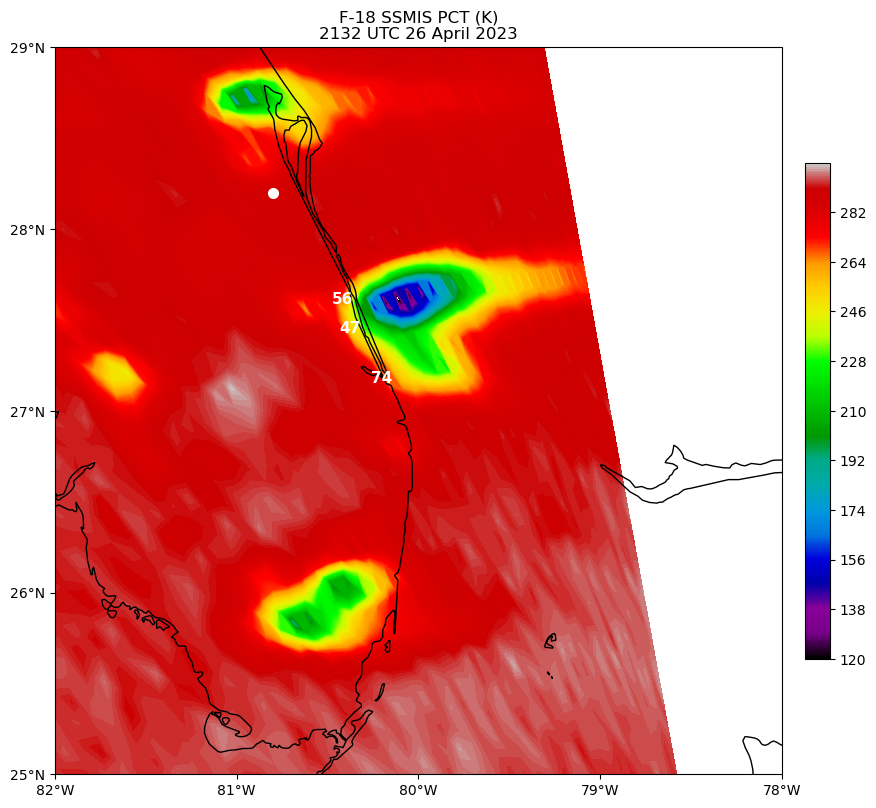

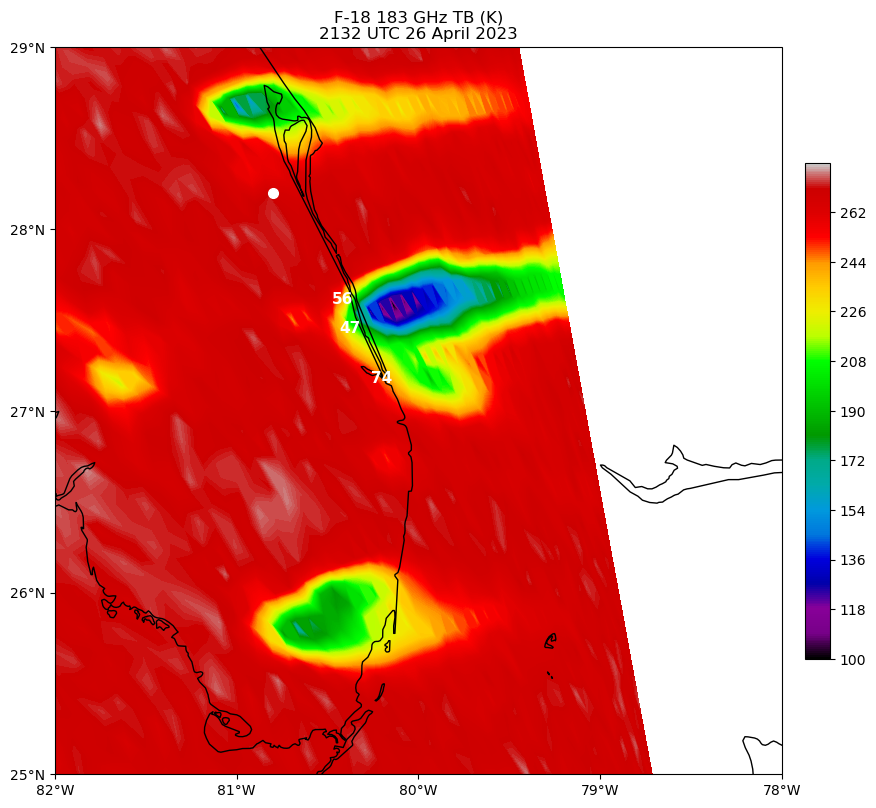

In [11]:
PCT = (1.818*TB2)-(0.818*TB1)
PCTmn = np.mean(PCT)
print("PCT mean = ", PCTmn)
PCT_max = np.amax(PCT)
PCT_min = np.amin(PCT)
print("PCT max =", PCT_max)
print("PCT min =", PCT_min)
print("PCT = ", PCT, PCT.shape)

fig = plt.figure(figsize=(10, 12))
img_extent = (-82, -78, 25, 29)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-82, -78, 25, 29], crs.PlateCarree(globe=None))

plt.title('F-18 SSMIS PCT (K)\n'
          '2132 UTC 26 April 2023')

Tlevels = np.arange(120,300,0.1)
cbtd = ax.contourf(lon_2,lat_2,PCT,Tlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='nipy_spectral')

ax.set_xticks([-82,-81,-80,-79,-78])
ax.set_yticks([25,26,27,28,29])   

ax.plot(-80.8, 28.2, 'ow', markersize=7, transform=crs.Geodetic())
ax.text(-80.41806, 27.65556, '56', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-80.37667, 27.49806, '47', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-80.2, 27.22, '74', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("ssmis_pct_2132.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-82, -78, 25, 29)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-82, -78, 25, 29], crs.PlateCarree(globe=None))

plt.title('F-18 183 GHz TB (K)\n'
          '2132 UTC 26 April 2023')

Tlevels = np.arange(100,280,0.1)
cbtd = ax.contourf(lon_1,lat_1,TB3,Tlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='nipy_spectral')

ax.set_xticks([-82,-81,-80,-79,-78])
ax.set_yticks([25,26,27,28,29])   

ax.plot(-80.8, 28.2, 'ow', markersize=7, transform=crs.Geodetic())
ax.text(-80.41806, 27.65556, '56', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-80.37667, 27.49806, '47', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-80.2, 27.22, '74', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("ssmis_tb183_7h_2132.png",dpi=250,bbox_inches='tight')
plt.show()

In [2]:
from __future__ import print_function, division
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import h5py
import cartopy.crs as crs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.cm as cm

In [9]:
plt.rcParams["figure.figsize"] = [8,8]
np.set_printoptions(suppress=True)

FILE_NAME = '3B-HHR-L.MS.MRG.3IMERG.20230426-S200000-E202959.1200.V06C.HDF5'
DATAFIELD_NAME = '/Grid/precipitationCal'
LATITUDE = '/Grid/lat'
LONGITUDE = '/Grid/lon'

with h5py.File(FILE_NAME, mode='r') as f:
    # List available datasets.
    print(f.keys())

    # Read dataset.
    dset = f[DATAFIELD_NAME]
    cal_precip_2000 = dset[0,:,:]
    print(cal_precip_2000,cal_precip_2000.shape)
    latitude_2000 = f[LATITUDE]
    lat_2000 = latitude_2000[:]
    print(lat_2000,lat_2000.shape)
    longitude_2000 = f[LONGITUDE]
    lon_2000 = longitude_2000[:]
    print(lon_2000,lon_2000.shape)

lat_imerg_2000,lon_imerg_2000 = np.meshgrid(lat_2000,lon_2000)
print(lat_imerg_2000,lat_imerg_2000.shape)
print(lon_imerg_2000,lon_imerg_2000.shape)
cal_precip_2000_max = np.amax(cal_precip_2000)
cal_precip_2000_min = np.amin(cal_precip_2000)
print("precip max =", cal_precip_2000_max)
print("precip min =", cal_precip_2000_min)
del_precip_2000 = np.gradient(cal_precip_2000)
del_precip_2000_x = del_precip_2000[0]
del_precip_2000_y = del_precip_2000[1]
print("Precip Gradient X = ", del_precip_2000_x)
print("Precip Gradient Y = ", del_precip_2000_y)
mag_2000 = np.sqrt(del_precip_2000[0]**2 + del_precip_2000[1]**2)
print("Precip Gradient = ", mag_2000)
cal_precip_2000[cal_precip_2000>16] = 15
mag_2000[mag_2000>6] = 5.5

plt.rcParams["figure.figsize"] = [8,8]
np.set_printoptions(suppress=True)

FILE_NAME = '3B-HHR-L.MS.MRG.3IMERG.20230426-S203000-E205959.1230.V06C.HDF5'
DATAFIELD_NAME = '/Grid/precipitationCal'
LATITUDE = '/Grid/lat'
LONGITUDE = '/Grid/lon'

with h5py.File(FILE_NAME, mode='r') as f:
    # List available datasets.
    print(f.keys())

    # Read dataset.
    dset = f[DATAFIELD_NAME]
    cal_precip_2030 = dset[0,:,:]
    print(cal_precip_2030,cal_precip_2030.shape)
    latitude_2030 = f[LATITUDE]
    lat_2030 = latitude_2030[:]
    print(lat_2030,lat_2030.shape)
    longitude_2030 = f[LONGITUDE]
    lon_2030 = longitude_2030[:]
    print(lon_2030,lon_2030.shape)

lat_imerg_2030,lon_imerg_2030 = np.meshgrid(lat_2030,lon_2030)
print(lat_imerg_2030,lat_imerg_2030.shape)
print(lon_imerg_2030,lon_imerg_2030.shape)
cal_precip_2030_max = np.amax(cal_precip_2030)
cal_precip_2030_min = np.amin(cal_precip_2030)
print("precip max =", cal_precip_2030_max)
print("precip min =", cal_precip_2030_min)
del_precip_2030 = np.gradient(cal_precip_2030)
del_precip_2030_x = del_precip_2030[0]
del_precip_2030_y = del_precip_2030[1]
print("Precip Gradient X = ", del_precip_2030_x)
print("Precip Gradient Y = ", del_precip_2030_y)
mag_2030 = np.sqrt(del_precip_2030[0]**2 + del_precip_2030[1]**2)
print("Precip Gradient = ", mag_2030)
cal_precip_2030[cal_precip_2030>16] = 15
mag_2030[mag_2030>6] = 5.5

plt.rcParams["figure.figsize"] = [8,8]
np.set_printoptions(suppress=True)

FILE_NAME = '3B-HHR-L.MS.MRG.3IMERG.20230426-S210000-E212959.1260.V06C.HDF5'
DATAFIELD_NAME = '/Grid/precipitationCal'
LATITUDE = '/Grid/lat'
LONGITUDE = '/Grid/lon'

with h5py.File(FILE_NAME, mode='r') as f:
    # List available datasets.
    print(f.keys())

    # Read dataset.
    dset = f[DATAFIELD_NAME]
    cal_precip_2100 = dset[0,:,:]
    print(cal_precip_2100,cal_precip_2100.shape)
    latitude_2100 = f[LATITUDE]
    lat_2100 = latitude_2100[:]
    print(lat_2100,lat_2100.shape)
    longitude_2100 = f[LONGITUDE]
    lon_2100 = longitude_2100[:]
    print(lon_2100,lon_2100.shape)

lat_imerg_2100,lon_imerg_2100 = np.meshgrid(lat_2100,lon_2100)
print(lat_imerg_2100,lat_imerg_2100.shape)
print(lon_imerg_2100,lon_imerg_2100.shape)
cal_precip_2100_max = np.amax(cal_precip_2100)
cal_precip_2100_min = np.amin(cal_precip_2100)
print("precip max =", cal_precip_2100_max)
print("precip min =", cal_precip_2100_min)
del_precip_2100 = np.gradient(cal_precip_2100)
del_precip_2100_x = del_precip_2100[0]
del_precip_2100_y = del_precip_2100[1]
print("Precip Gradient X = ", del_precip_2100_x)
print("Precip Gradient Y = ", del_precip_2100_y)
mag_2100 = np.sqrt(del_precip_2100[0]**2 + del_precip_2100[1]**2)
print("Precip Gradient = ", mag_2100)
cal_precip_2100[cal_precip_2100>16] = 15
mag_2100[mag_2100>6] = 5.5

plt.rcParams["figure.figsize"] = [8,8]
np.set_printoptions(suppress=True)

FILE_NAME = '3B-HHR-L.MS.MRG.3IMERG.20230426-S213000-E215959.1290.V06C.HDF5'
DATAFIELD_NAME = '/Grid/precipitationCal'
LATITUDE = '/Grid/lat'
LONGITUDE = '/Grid/lon'

with h5py.File(FILE_NAME, mode='r') as f:
    # List available datasets.
    print(f.keys())

    # Read dataset.
    dset = f[DATAFIELD_NAME]
    cal_precip_2130 = dset[0,:,:]
    print(cal_precip_2130,cal_precip_2130.shape)
    latitude_2130 = f[LATITUDE]
    lat_2130 = latitude_2130[:]
    print(lat_2130,lat_2130.shape)
    longitude_2130 = f[LONGITUDE]
    lon_2130 = longitude_2130[:]
    print(lon_2130,lon_2130.shape)

lat_imerg_2130,lon_imerg_2130 = np.meshgrid(lat_2130,lon_2130)
print(lat_imerg_2130,lat_imerg_2130.shape)
print(lon_imerg_2130,lon_imerg_2130.shape)
cal_precip_2130_max = np.amax(cal_precip_2130)
cal_precip_2130_min = np.amin(cal_precip_2130)
print("precip max =", cal_precip_2130_max)
print("precip min =", cal_precip_2130_min)
del_precip_2130 = np.gradient(cal_precip_2130)
del_precip_2130_x = del_precip_2130[0]
del_precip_2130_y = del_precip_2130[1]
print("Precip Gradient X = ", del_precip_2130_x)
print("Precip Gradient Y = ", del_precip_2130_y)
mag_2130 = np.sqrt(del_precip_2130[0]**2 + del_precip_2130[1]**2)
print("Precip Gradient = ", mag_2130)
cal_precip_2130[cal_precip_2130>16] = 15
mag_2130[mag_2130>6] = 5.5

<KeysViewHDF5 ['Grid']>
[[-9999.9 -9999.9 -9999.9 ...     0.      0.      0. ]
 [-9999.9 -9999.9 -9999.9 ... -9999.9     0.      0. ]
 [-9999.9 -9999.9 -9999.9 ... -9999.9     0.      0. ]
 ...
 [-9999.9 -9999.9 -9999.9 ... -9999.9     0.      0. ]
 [-9999.9 -9999.9 -9999.9 ... -9999.9     0.      0. ]
 [-9999.9 -9999.9 -9999.9 ... -9999.9     0.      0. ]] (3600, 1800)
[-89.95 -89.85 -89.75 ...  89.75  89.85  89.95] (1800,)
[-179.95 -179.85 -179.75 ...  179.75  179.85  179.95] (3600,)
[[-89.95 -89.85 -89.75 ...  89.75  89.85  89.95]
 [-89.95 -89.85 -89.75 ...  89.75  89.85  89.95]
 [-89.95 -89.85 -89.75 ...  89.75  89.85  89.95]
 ...
 [-89.95 -89.85 -89.75 ...  89.75  89.85  89.95]
 [-89.95 -89.85 -89.75 ...  89.75  89.85  89.95]
 [-89.95 -89.85 -89.75 ...  89.75  89.85  89.95]] (3600, 1800)
[[-179.95 -179.95 -179.95 ... -179.95 -179.95 -179.95]
 [-179.85 -179.85 -179.85 ... -179.85 -179.85 -179.85]
 [-179.75 -179.75 -179.75 ... -179.75 -179.75 -179.75]
 ...
 [ 179.75  179.75  179.75 

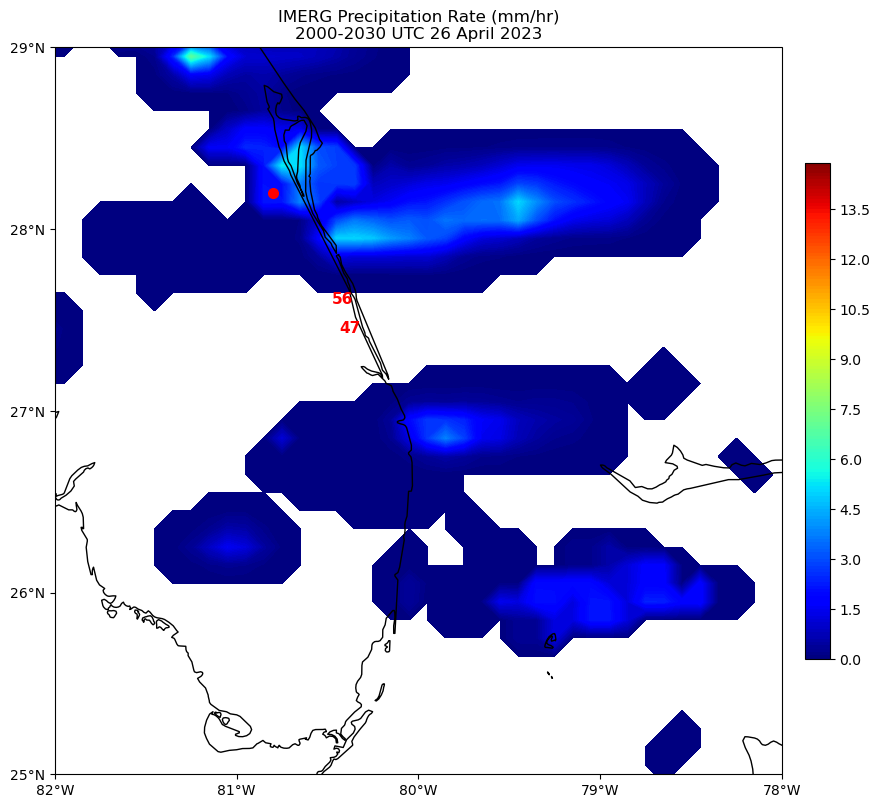

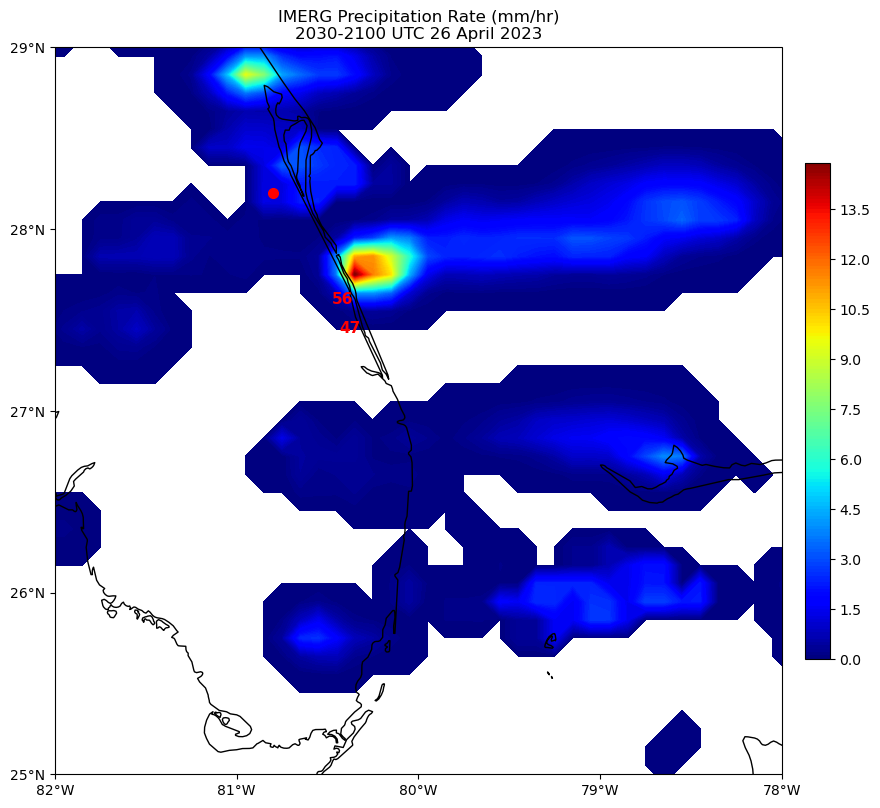

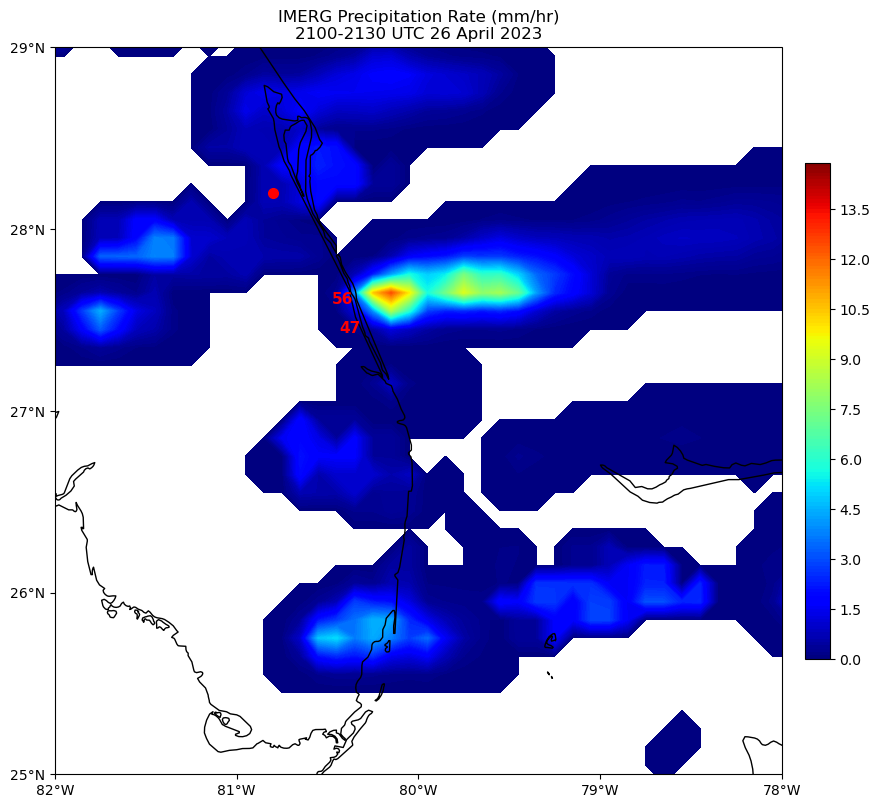

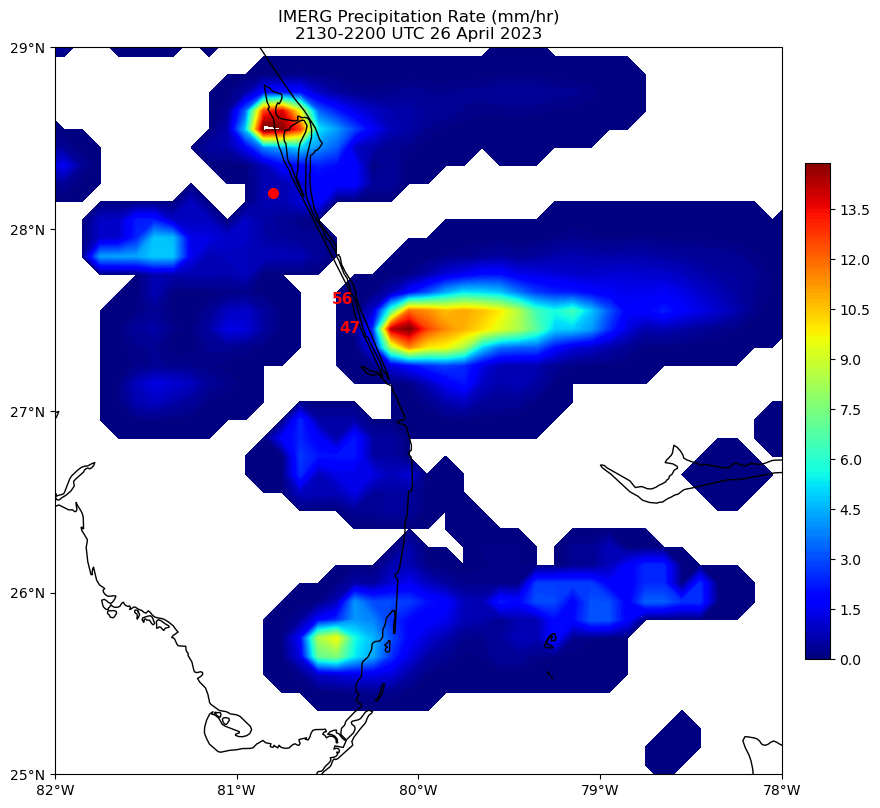

'\nplt.title(\'IMERG Precipitation Gradient\n\' \n          \'1500-1530 UTC 23 October 2022\')\n\nPlevels = np.arange(0,6,0.1)\ncbtd = ax.contourf(lon_imerg_1500,lat_imerg_1500,mag_1500,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap=\'jet\',vmin=0,vmax=6)\n\nax.set_xticks([-5,-4,-3,-2,-1,0,1])\nax.set_yticks([49,50,51,52,53])   \n\nax.plot(-0.1, 51.0, \'ow\', markersize=7, transform=crs.Geodetic())\nax.text(-1.566596, 51.143141, \'54\', color=\'white\', weight=\'bold\', fontsize=11, ha=\'center\', va=\'top\', style=\'normal\', transform=crs.Geodetic())\n\nax.add_feature(cfeature.COASTLINE)\nax.add_feature(cfeature.BORDERS)\n\nlon_formatter = LongitudeFormatter()\nlat_formatter = LatitudeFormatter()\n\nax.xaxis.set_major_formatter(lon_formatter)\nax.yaxis.set_major_formatter(lat_formatter)\ncbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)\nplt.savefig("imerg_del_precip_1500.png",dpi=250,bbox_inches=\'tight\')\nplt.show()\n\nfig = plt.figure(figsize=(10, 12))\nimg_ex

In [10]:
fig = plt.figure(figsize=(10, 12))
img_extent = (-82, -78, 25, 29)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-82, -78, 25, 29], crs.PlateCarree(globe=None))

plt.title('IMERG Precipitation Rate (mm/hr)\n' 
          '2000-2030 UTC 26 April 2023')

Plevels = np.arange(0,15,0.1)
cbtd = ax.contourf(lon_imerg_2000,lat_imerg_2000,cal_precip_2000,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet',vmin=0,vmax=15)

ax.set_xticks([-82,-81,-80,-79,-78])
ax.set_yticks([25,26,27,28,29])   

ax.plot(-80.8, 28.2, 'or', markersize=7, transform=crs.Geodetic())
ax.text(-80.41806, 27.65556, '56', color='red', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-80.37667, 27.49806, '47', color='red', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("imerg_precip_2000.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-82, -78, 25, 29)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-82, -78, 25, 29], crs.PlateCarree(globe=None))

plt.title('IMERG Precipitation Rate (mm/hr)\n' 
          '2030-2100 UTC 26 April 2023')

Plevels = np.arange(0,15,0.1)
cbtd = ax.contourf(lon_imerg_2030,lat_imerg_2030,cal_precip_2030,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet',vmin=0,vmax=15)

ax.set_xticks([-82,-81,-80,-79,-78])
ax.set_yticks([25,26,27,28,29])   

ax.plot(-80.8, 28.2, 'or', markersize=7, transform=crs.Geodetic())
ax.text(-80.41806, 27.65556, '56', color='red', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-80.37667, 27.49806, '47', color='red', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("imerg_precip_2030.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-82, -78, 25, 29)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-82, -78, 25, 29], crs.PlateCarree(globe=None))

plt.title('IMERG Precipitation Rate (mm/hr)\n' 
          '2100-2130 UTC 26 April 2023')

Plevels = np.arange(0,15,0.1)
cbtd = ax.contourf(lon_imerg_2100,lat_imerg_2100,cal_precip_2100,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet',vmin=0,vmax=15)

ax.set_xticks([-82,-81,-80,-79,-78])
ax.set_yticks([25,26,27,28,29])   

ax.plot(-80.8, 28.2, 'or', markersize=7, transform=crs.Geodetic())
ax.text(-80.41806, 27.65556, '56', color='red', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-80.37667, 27.49806, '47', color='red', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("imerg_precip_2100.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-82, -78, 25, 29)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-82, -78, 25, 29], crs.PlateCarree(globe=None))

plt.title('IMERG Precipitation Rate (mm/hr)\n' 
          '2130-2200 UTC 26 April 2023')

Plevels = np.arange(0,15,0.1)
cbtd = ax.contourf(lon_imerg_2130,lat_imerg_2130,cal_precip_2130,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet',vmin=0,vmax=15)

ax.set_xticks([-82,-81,-80,-79,-78])
ax.set_yticks([25,26,27,28,29])   

ax.plot(-80.8, 28.2, 'or', markersize=7, transform=crs.Geodetic())
ax.text(-80.41806, 27.65556, '56', color='red', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-80.37667, 27.49806, '47', color='red', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("imerg_precip_2130.png",dpi=250,bbox_inches='tight')
plt.show()

"""
plt.title('IMERG Precipitation Gradient\n' 
          '1500-1530 UTC 23 October 2022')

Plevels = np.arange(0,6,0.1)
cbtd = ax.contourf(lon_imerg_1500,lat_imerg_1500,mag_1500,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet',vmin=0,vmax=6)

ax.set_xticks([-5,-4,-3,-2,-1,0,1])
ax.set_yticks([49,50,51,52,53])   

ax.plot(-0.1, 51.0, 'ow', markersize=7, transform=crs.Geodetic())
ax.text(-1.566596, 51.143141, '54', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("imerg_del_precip_1500.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-5, 1, 49, 53)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-5, 1, 49, 53], crs.PlateCarree(globe=None))
"""